In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
#columns are called as features
# x axis are features and y axis are last column or target column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [5]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [6]:
#Drop duplicate column( temp c) and unamed column
data1=data.drop(['Unnamed: 0',"Temp C"], axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [7]:
#convert the month column data type to float data type
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [8]:
#print all duplicated rows
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
#Drop duplicated rows
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


## Rename the columns


In [10]:
#solar.r is a current name
#solar is a changed name
#inplace=original data is modified

data1.rename({'Solar.R':'Solar'},axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


## Impute the missing values 

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [12]:
#Display data1 missing Values count in each column using isnull.sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

## visualization of missing valuess

<Axes: >

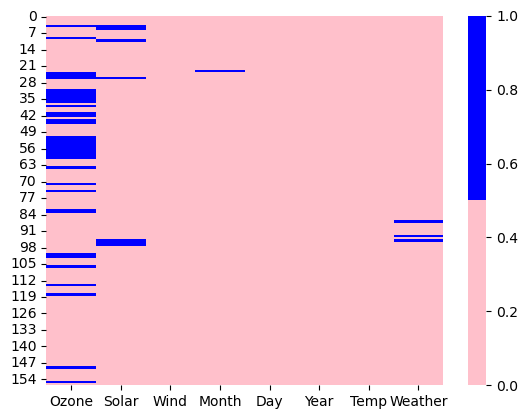

In [13]:
#visualize data1 missing values using heat map
cols=data1.columns
colors=['pink','blue']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar=True)

In [14]:
#find the mean and median values of each numeric 
#Imputation of missing value with median
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of ozone: ",median_ozone)
print("Mean of ozone:",mean_ozone)
print("Mean of ozone:",data1["Ozone"].mean())

Median of ozone:  31.0
Mean of ozone: 41.81512605042017
Mean of ozone: 41.81512605042017


In [15]:
#Replace the Ozone missing values with median values
data1['Ozone']=data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [16]:
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
print("Median of Solar: ",median_solar)
print("Mean of Solar:",mean_solar)
print("Mean of Solar:",data1["Solar"].mean())

Median of Solar:  199.0
Mean of Solar: 185.36666666666667
Mean of Solar: 185.36666666666667


In [17]:
#Replace the Solar missing values with mean values
data1['Solar']=data1['Solar'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

## 27/01/2025

In [18]:
#find the mode values of categorical column(weather)
print(data1["Weather"].value_counts())
mode_weather=data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [19]:
#Impute missing values (Replace NaN with mode etc.)"weather" using fillna()
data1["Weather"]=data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [20]:
print(data1["Month"].value_counts())
mode_Month=data1["Month"].mode()[0]
print(mode_Month)

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [21]:
data1["Month"]=data1["Month"].fillna(mode_Month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [22]:
#outliers: extreme values in the dataset
#boxplot and histogram are two imp visualizations in outlier

## Detection of outliers in the columns

outliers are maximum values

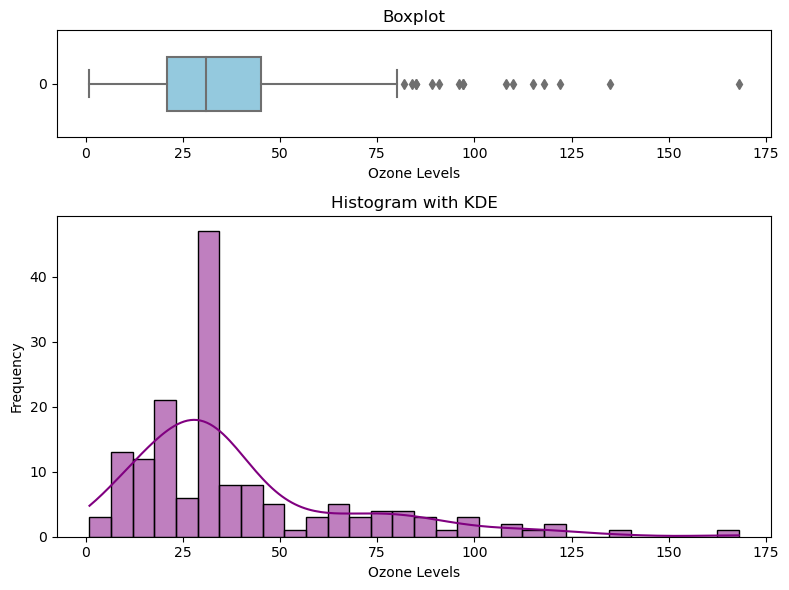

In [23]:
# Assuming 'data1' is a DataFrame already defined elsewhere
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Observations

 The Ozone column has extreme values beyond 81 as seen from box plot
 
 The same is confirmed from the below right skewed histogram
 

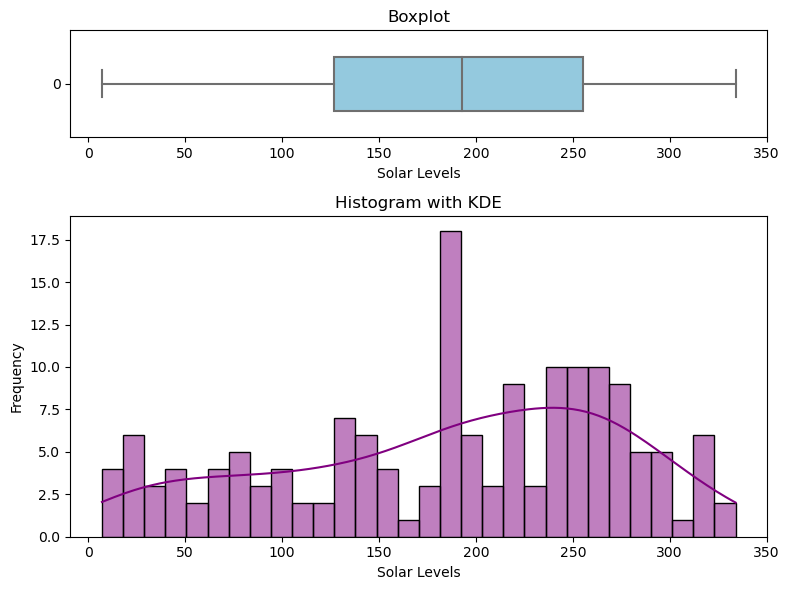

In [24]:
# Assuming 'data1' is a DataFrame already defined elsewhere
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The distribution is not perfectly symmetric and it is left skewed 

There is no outliers in above observation

## 28/01/2025

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa5a862010>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa5a863750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa5a861390>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa5a86ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa5a82d790>],
 'means': []}

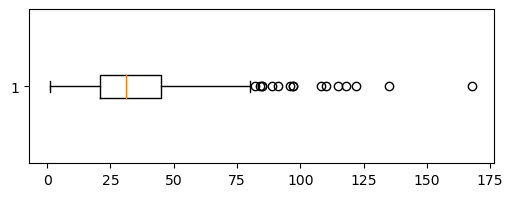

In [25]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa5ab83b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa5ab8d350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa5ab82e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa5ab8e910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa5ab82650>],
 'means': []}

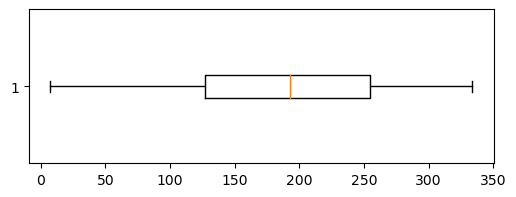

In [26]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Solar"], vert=False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

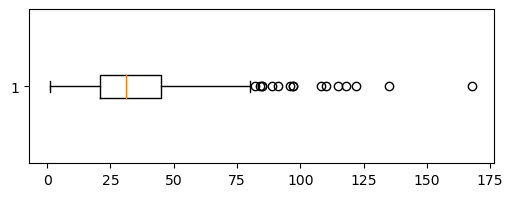

In [27]:
#extract ouliers from boxplot for ozone column
plt.figure(figsize=(6,2))
boxplot_data=plt.boxplot(data1["Ozone"],vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]#fliers are outliers

## Method 2
- **Using mu +/-3*sigma limits(Standard deviation method)**

- **any value<mu-3sigma**
           or
- **any value>mu+3sigma**

These are called data points

In [28]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [29]:
mu=data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if ((x<(mu-3*sigma)) or (x>(mu+3*sigma))):
        print(x)

135.0
168.0


## Observations
- It is observed that only two outliers are identified  using std method
- In box plot method more no of outliers are identified
- This is because the assumption of normality is not satisfied in this column

### Quantile-Quantile plot for detection of outliers
- quantiles are divide the data into some divisions

Text(0.5, 0, 'Theoretical Quantiles')

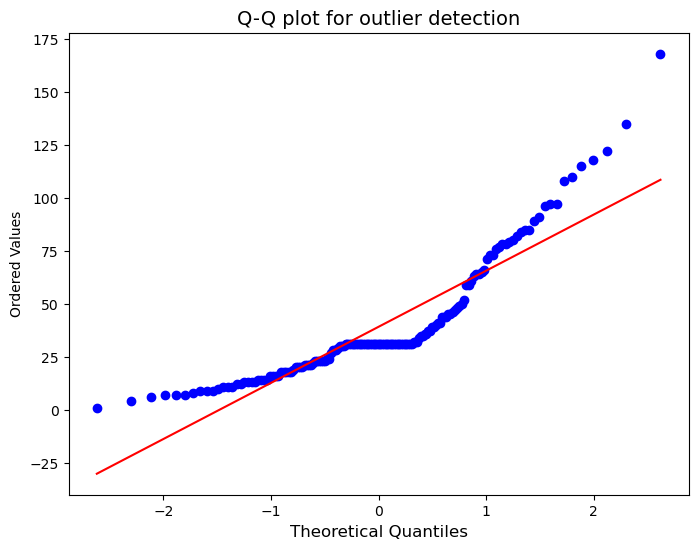

In [30]:
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q plot for outlier detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

 *****Observations*****
- The data does not follow normal distribution as the data points are deviating significantly away from the red line
- The data shows a right-skewed distribution and possible outliers

### Q-Q plot for solar column

Text(0.5, 0, 'Theoretical Quantiles')

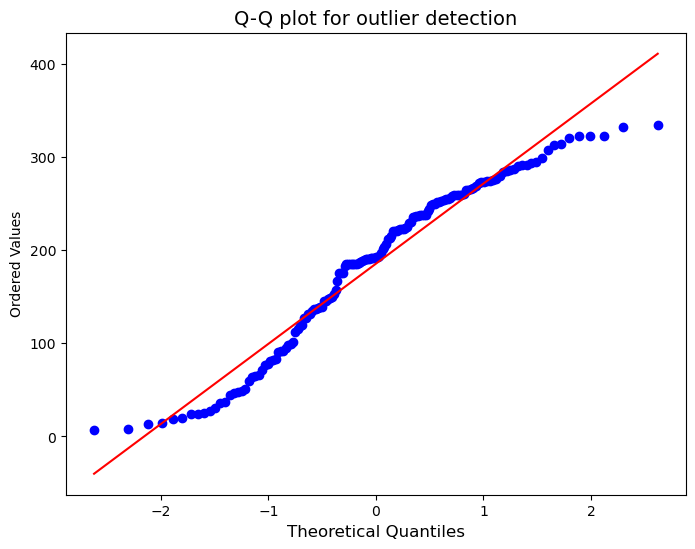

In [31]:
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Solar"], dist="norm", plot=plt)
plt.title("Q-Q plot for outlier detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

## 29/01/2025

<function matplotlib.pyplot.show(close=None, block=None)>

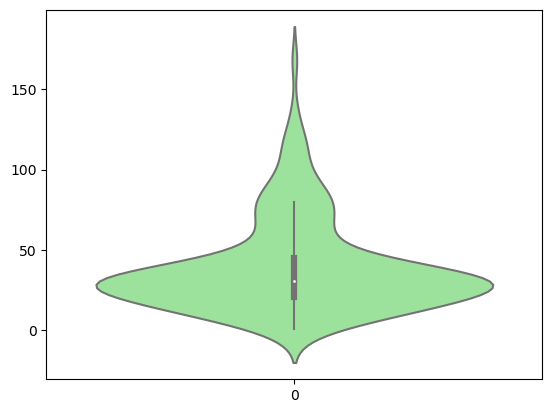

In [32]:
#create a figure for violin plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
#show the plot
plt.show

C:\Users\Spoorthi\AppData\Local\Temp\ipykernel_23404\2458836644.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data1, x="Weather", y="Ozone", color="orange", palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

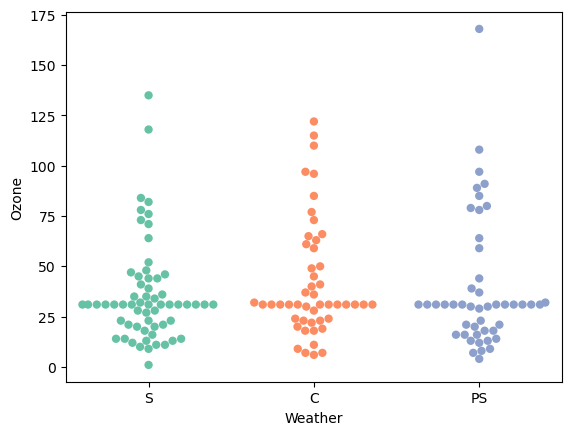

In [33]:
sns.swarmplot(data=data1, x="Weather", y="Ozone", color="orange", palette="Set2",size=6)

- **In Swarmplot data points are not overlapped**

C:\Users\Spoorthi\AppData\Local\Temp\ipykernel_23404\1576575990.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=data1, x="Weather", y="Ozone", color="orange", palette="Set2",size=6, jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

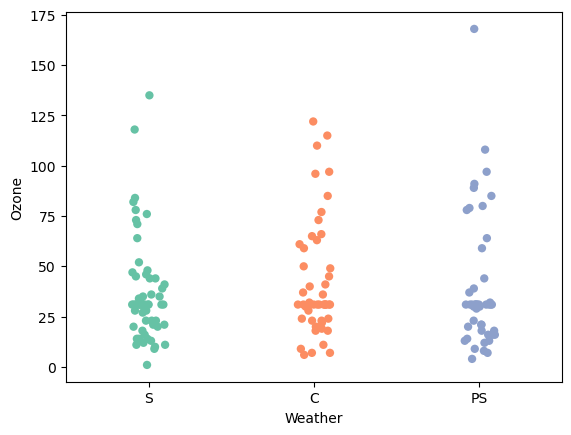

In [34]:
sns.stripplot(data=data1, x="Weather", y="Ozone", color="orange", palette="Set2",size=6, jitter=True)

- **In stripplot data points are crowded one on another**

<Axes: xlabel='Ozone', ylabel='Density'>

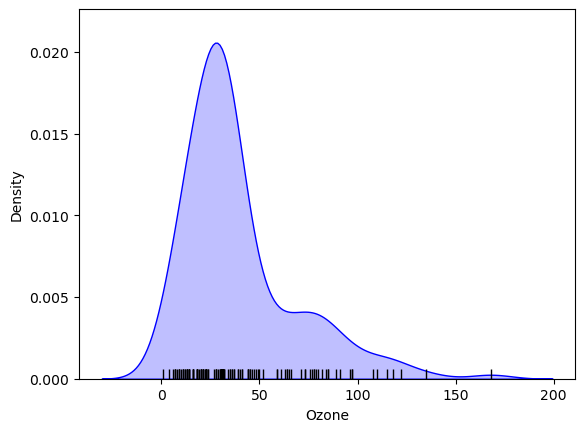

In [35]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

- **kde=kernal density estimate plot**
- *without histogram the kdeplot will be shown*

<Axes: xlabel='Weather', ylabel='Ozone'>

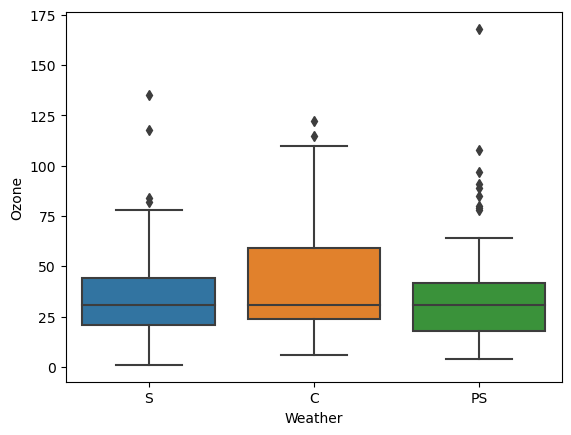

In [36]:
#category wise boxplot for ozone
sns.boxplot(data=data1, x="Weather", y="Ozone")

<Axes: ylabel='Ozone'>

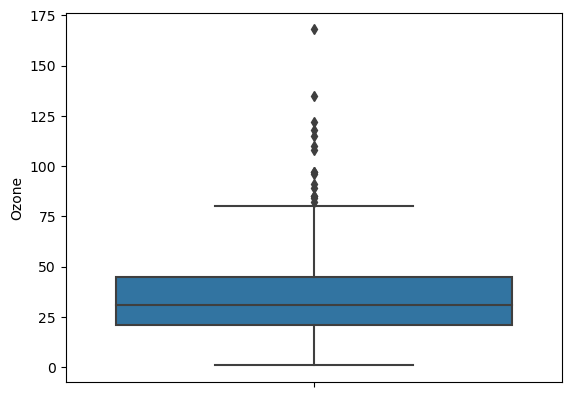

In [37]:
sns.boxplot(data=data1, y="Ozone")

- *Boxplot*
- *histogram*
- *kdeplot: kernal density estimate plot*
- *violin plot* 
- **All these are Univarient visualizations**

## Scatter plot

- Scatter plot is a plot which does not join any points

##  Correlation coefficient and pair plots

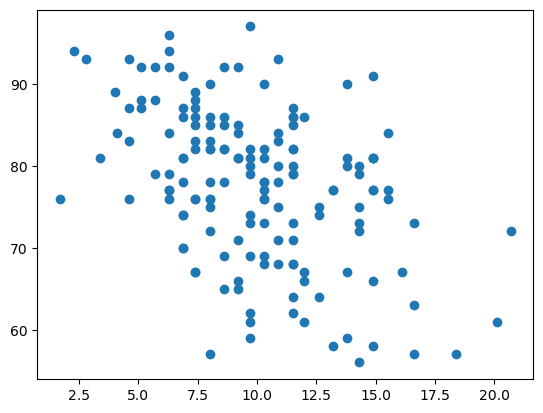

In [38]:
plt.scatter(data1["Wind"], data1["Temp"])

In [39]:
#compute pearson correlation coefficient between wind and temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

## Observation
- The coorelation between wind and temp is observed to be negatively correleated with mild strength

## 30/01/2025

In [40]:
#read all numeric (float) columns into a new table data1_numeric
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,185.366667,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77


In [44]:
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,31.0,185.366667,14.3,5.0,5,2010,56,S


In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    157 non-null    float64
 1   Solar    157 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  157 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 15.1+ KB


In [52]:
#print correlation coefficients for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.297661,-0.523738,0.597087
Solar,0.297661,1.000000,-0.055874,0.260677
Wind,-0.523738,-0.055874,1.000000,-0.441228
Temp,0.597087,0.260677,-0.441228,1.000000


## observations
- The highest correlation is produced between Temp and Ozone(0.597087)
- The next highest correlation is observed between Ozone and Wind(-0.523738)
- The lowest coorelation is observed between Wind and solar(-0.055874)

C:\Users\Spoorthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


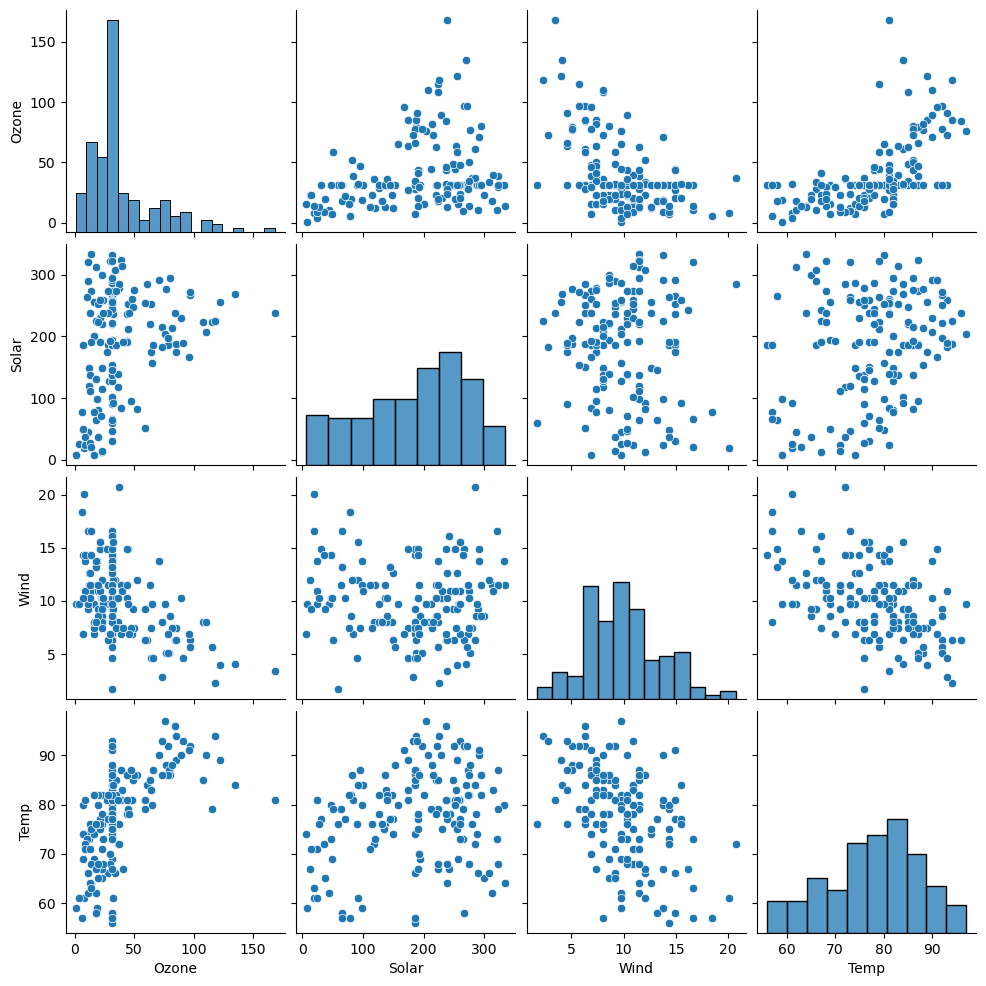

In [53]:
#plot a pair plot between all numeric columns using seaborn
sns.pairplot(data1_numeric)

## Transformations

- convert the categorical data into numeric is called one heart encoding

In [62]:
#creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.000000,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.000000,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.000000,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,185.366667,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,190.000000,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.000000,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,145.000000,13.2,27,2010,77,False,False,False,False,True,False,False,True


## Normalization of data

- covert the numeric values by using z score scaling and  feature scaling
- z=x-mu/sigma


In [65]:
data1_numeric.values

array([[ 41.        , 190.        ,   7.4       ,  67.        ],
       [ 36.        , 118.        ,   8.        ,  72.        ],
       [ 12.        , 149.        ,  12.6       ,  74.        ],
       [ 18.        , 313.        ,  11.5       ,  62.        ],
       [ 31.        , 185.36666667,  14.3       ,  56.        ],
       [ 28.        , 185.36666667,  14.9       ,  66.        ],
       [ 23.        , 299.        ,   8.6       ,  65.        ],
       [ 19.        ,  99.        ,  13.8       ,  59.        ],
       [  8.        ,  19.        ,  20.1       ,  61.        ],
       [ 31.        , 194.        ,   8.6       ,  69.        ],
       [  7.        , 185.36666667,   6.9       ,  74.        ],
       [ 16.        , 256.        ,   9.7       ,  69.        ],
       [ 11.        , 290.        ,   9.2       ,  66.        ],
       [ 14.        , 274.        ,  10.9       ,  68.        ],
       [ 18.        ,  65.        ,  13.2       ,  58.        ],
       [ 14.        , 334

In [70]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array=data1_numeric.values

scaler=MinMaxScaler(feature_range=(0,1))
rescaldex=scaler.fit_transform(array)

#Transformed data
set_printoptions(precision=2)
print(rescaldex[0:10,:])

[[0.24 0.56 0.3  0.27]
 [0.21 0.34 0.33 0.39]
 [0.07 0.43 0.57 0.44]
 [0.1  0.94 0.52 0.15]
 [0.18 0.55 0.66 0.  ]
 [0.16 0.55 0.69 0.24]
 [0.13 0.89 0.36 0.22]
 [0.11 0.28 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [0.18 0.57 0.36 0.32]]
